In [1]:
import numpy as np
import h5py
import fbpca
import matplotlib.pyplot as plt


np.random.seed(0)
plt.rcParams.update({'font.size': 16})
indices = np.arange(140)

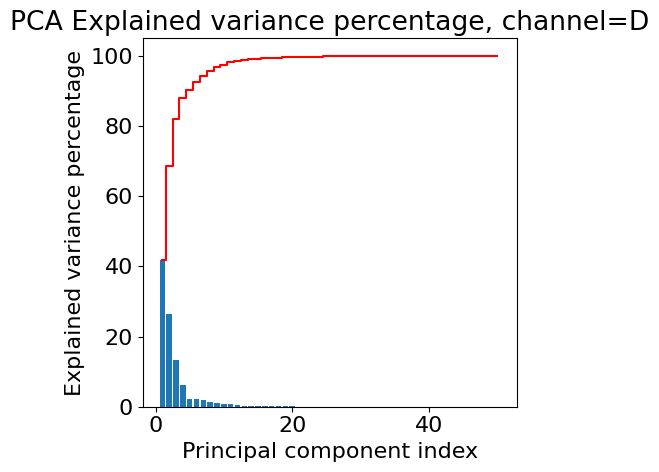

10


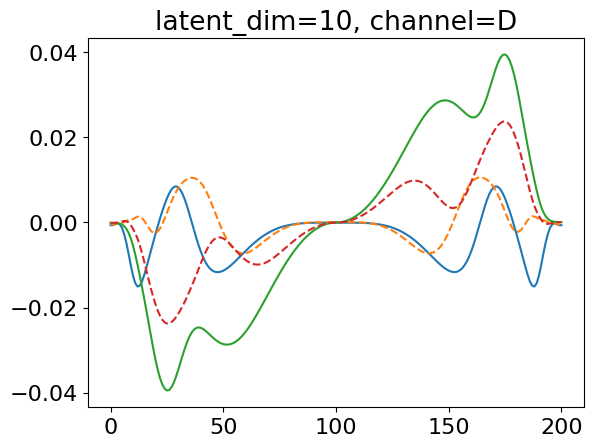

15


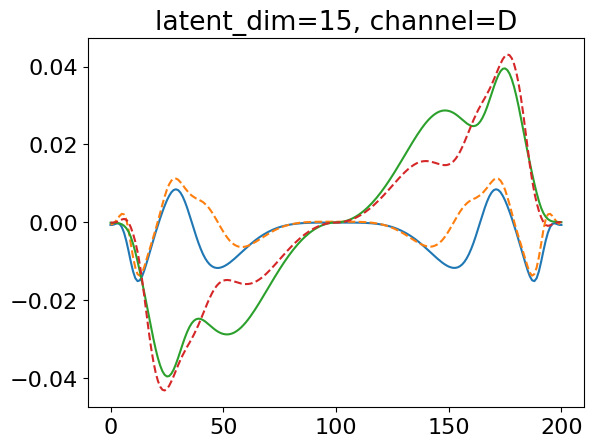

30


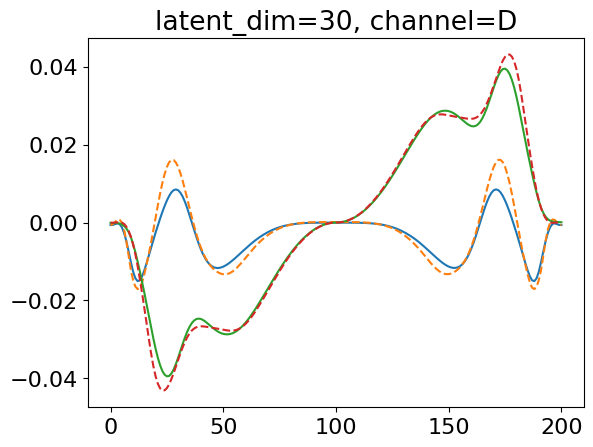

50


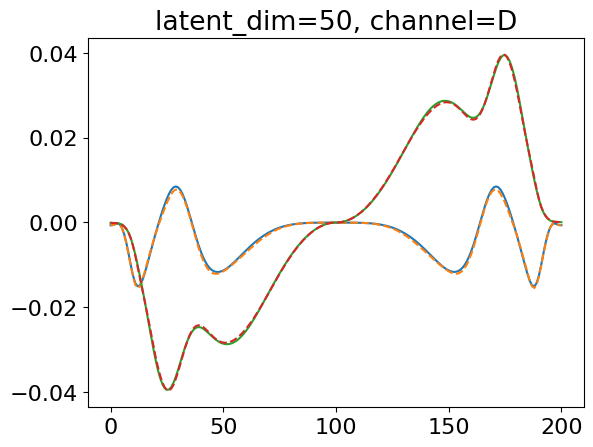

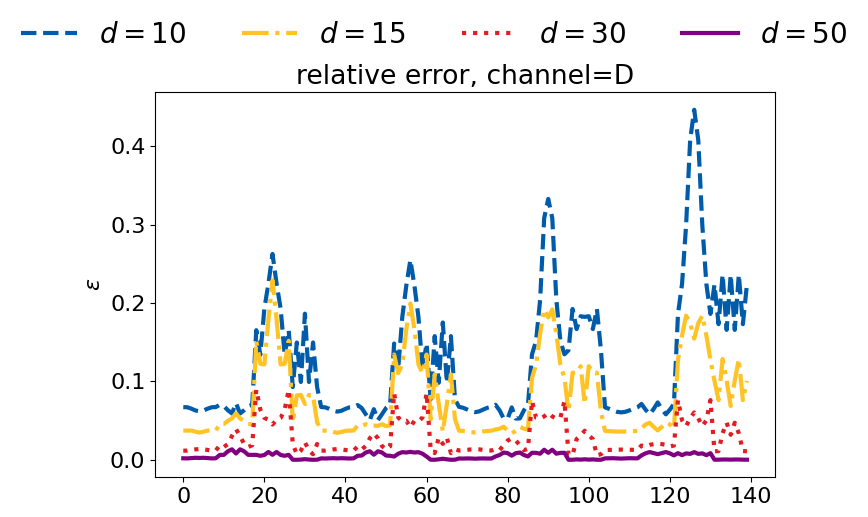

-----------------------------


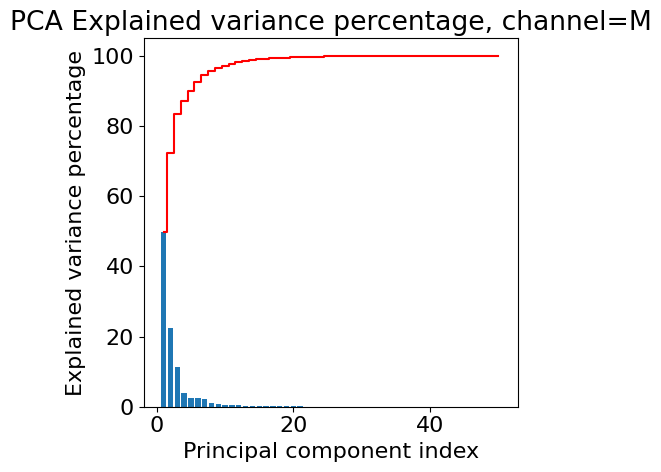

10


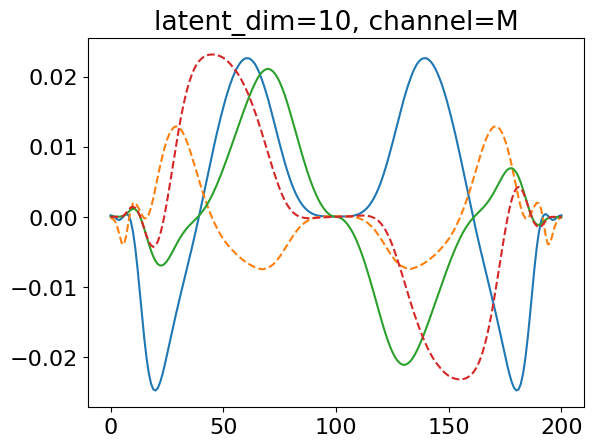

15


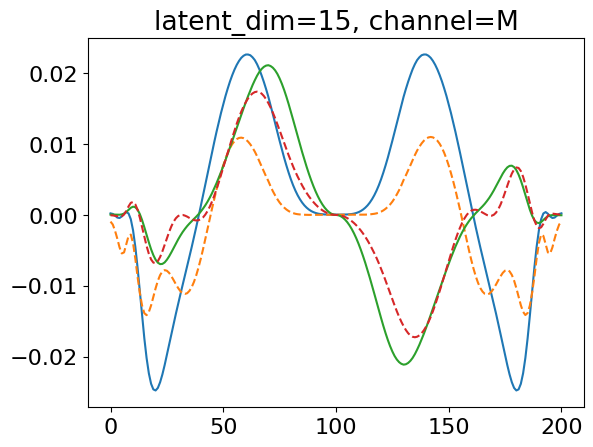

30


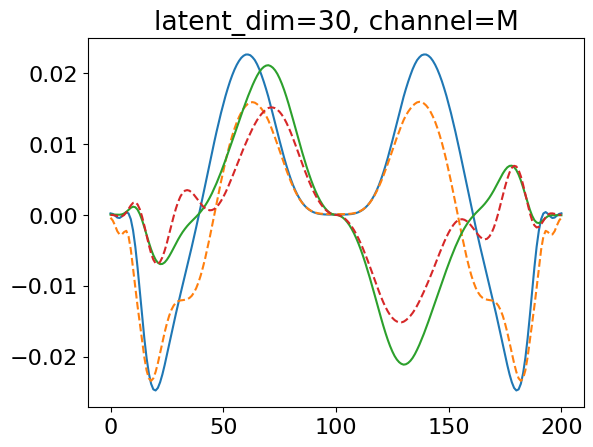

50


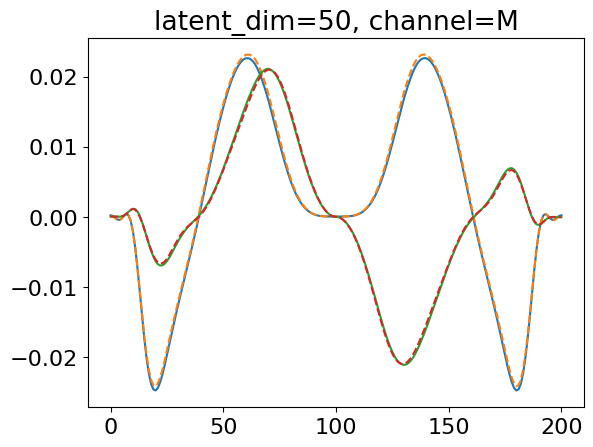

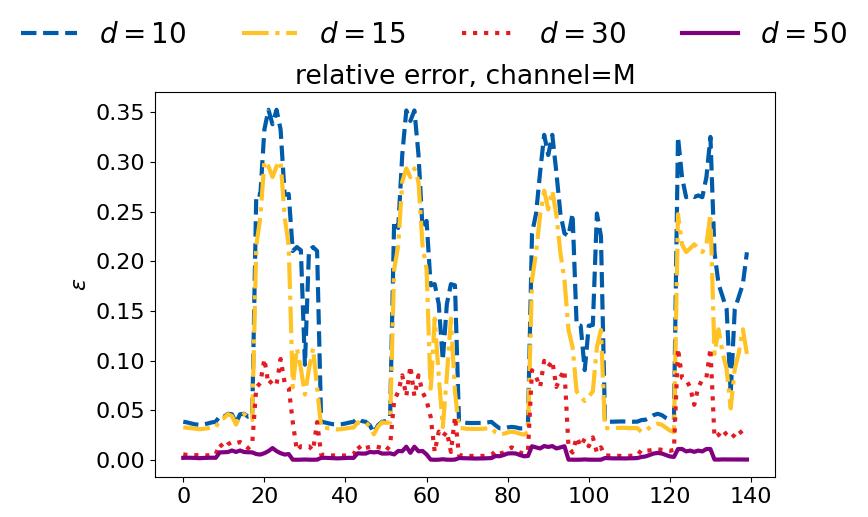

-----------------------------


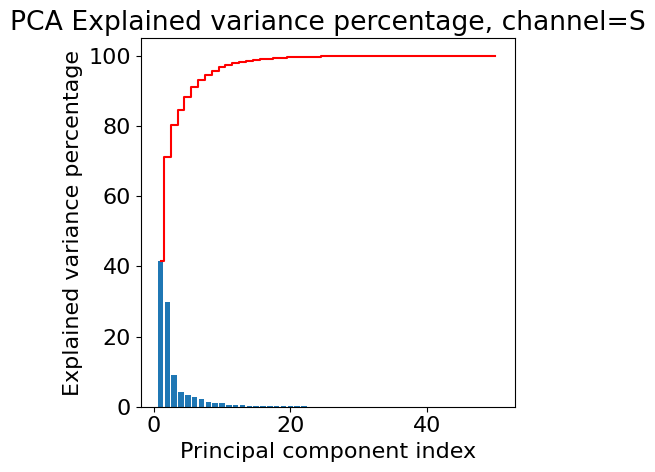

10


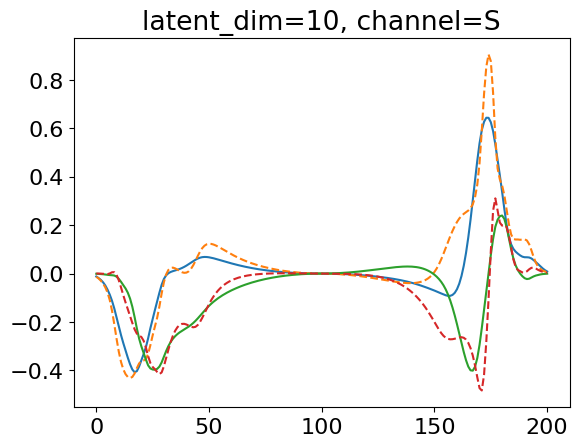

15


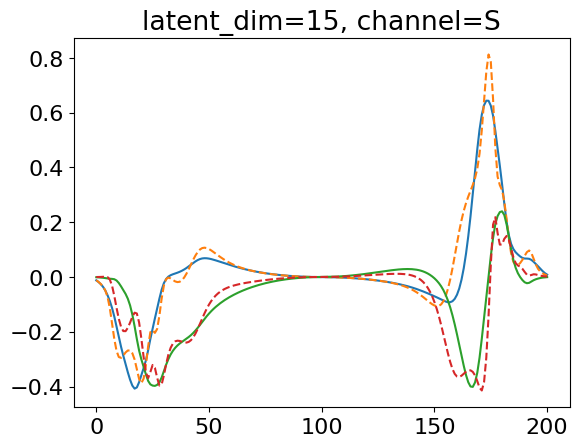

30


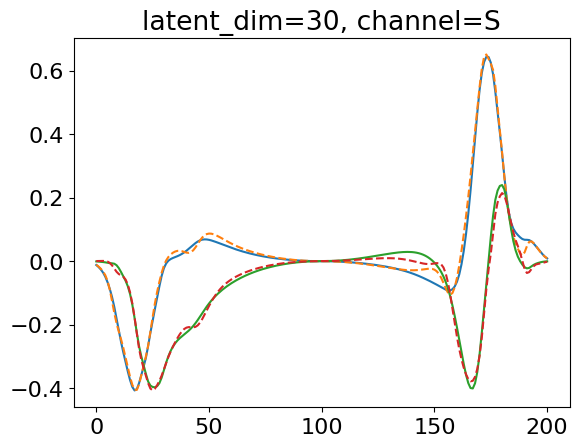

50


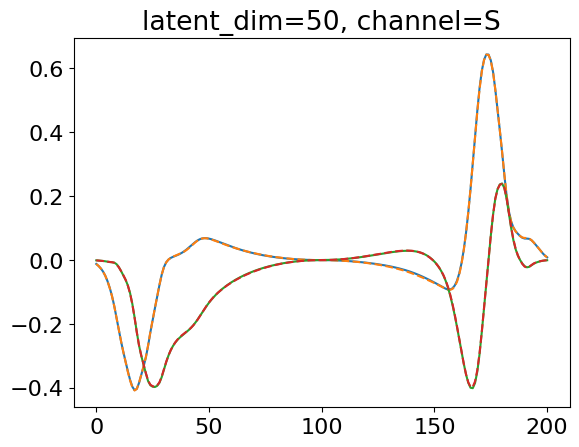

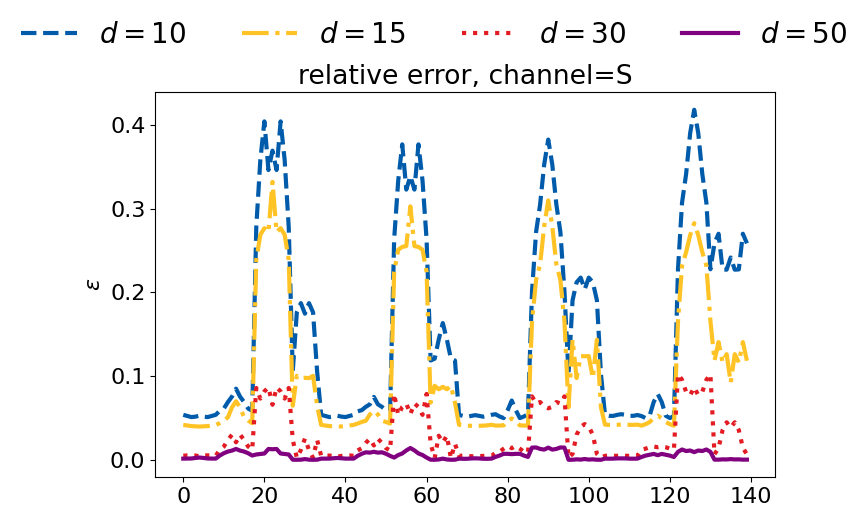

-----------------------------


In [2]:
for ch in ["D","M","S"]:
    filename = f"/mnt/home/jzang/ceph/freq_frg/store_data/vertex_K2.h5"
    with h5py.File(filename, 'r') as file:
        vertex_K2_ch=np.array(file[f'vertex_K2_{ch}'])
        vertex_K2_ch_mean=np.array(file[f'vertex_K2_{ch}_mean'])
    vertex_K2_ch=vertex_K2_ch.reshape(vertex_K2_ch.shape[0],-1)
    components =50
    # print(f"component={components}")
    # Perform PCA using fbpca
    U, S, Vh = fbpca.pca(vertex_K2_ch, k=components, raw=True,n_iter=4,l=components+10)
    
    exp_var = (S**2) / np.sum(S**2)
    exp_var_ratio = exp_var * 100  # Convert to percentage
    
    cum_exp_var = np.cumsum(exp_var_ratio)
    
    plt.figure(figsize=(5,5))
    
    plt.bar(range(1, components+1), exp_var_ratio , align='center',
            label='Individual variance')
    
    plt.step(range(1, components+1), cum_exp_var, where='mid',
             label='Cumulative variance', color='red')
    
    plt.ylabel('Explained variance percentage')
    plt.xlabel('Principal component index')
    # plt.legend(loc='right')
    plt.title(f"PCA Explained variance percentage, channel={ch}")#,T={T}")
    plt.tight_layout()
    #plt.savefig(f'fig/explain_variance.png',dpi=600, bbox_inches='tight')
    plt.show()
    ########################
    sample=20
    errors_pca_list=[]
    pca_latent_dims = [10,15,30,50]
    for latent_dim in pca_latent_dims:
        using_pca=latent_dim
        print(using_pca)
        reconstructed_imag = np.dot(U[:,:using_pca] * S[:using_pca], Vh[:using_pca, :])
    
        # Calculate error for complex data
    
        squared_diff_magnitude = np.sum(np.abs(vertex_K2_ch - reconstructed_imag)**2, axis=1)
        squared_orig_magnitude = np.sum(np.abs(vertex_K2_ch)**2, axis=1)
        error = np.sqrt(squared_diff_magnitude / squared_orig_magnitude)
        errors_pca_list.append(error)
        plt.plot(vertex_K2_ch[sample].reshape(201,101,2,2,2,2)[:,50,0,0,0,0].imag,label="imaginary part")
        plt.plot(reconstructed_imag[sample].reshape(201,101,2,2,2,2)[:,50,0,0,0,0].imag,"--",label="imaginary part")
        plt.plot(vertex_K2_ch[sample].reshape(201,101,2,2,2,2)[:,50,0,0,0,0].real,label="real part")
        plt.plot(reconstructed_imag[sample].reshape(201,101,2,2,2,2)[:,50,0,0,0,0].real,"--",label="real part")
        plt.title(f"latent_dim={latent_dim}, channel={ch}")
        plt.show()
    
    cmap_blue = plt.get_cmap('Blues')
    cmap_red = plt.get_cmap('Reds')
    
    line_colors = [(0, 92/255, 171/255), (255/255, 195/255, 37/255),  (227/255, 27/255, 35/255),"purple"]
    
    line_styles = [ 'dashed', 'dashdot','dotted','solid']
    
    
    
    fig, ax = plt.subplots(figsize=(8,5))
    # Plotting the errors for PCA
    
    for i, latent_dim in enumerate(pca_latent_dims):
        color = cmap_red((5-i) / 5)  # Adjust intensity based on position
        color=line_colors[i]
        ax.plot( errors_pca_list[i], label=f'$d={latent_dim}$',  color=color,linestyle=line_styles[i],linewidth=3)
    # ax.set_xlabel(f'$t\'$')
    ax.set_ylabel(r'$\epsilon$')
    plt.title(f"relative error, channel={ch}")
    ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.25), ncol=4, fontsize=20, frameon=False)
    plt.show()
    print("-----------------------------")


10
15
30
50


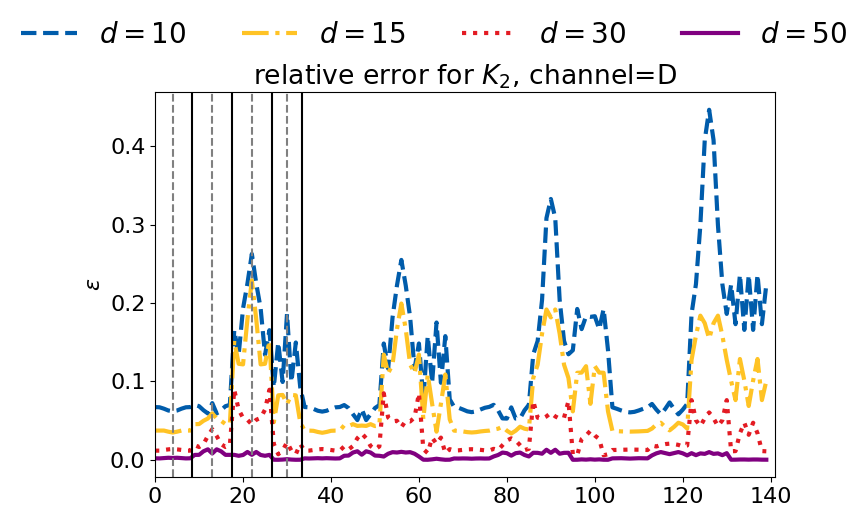

-----------------------------
10
15
30
50


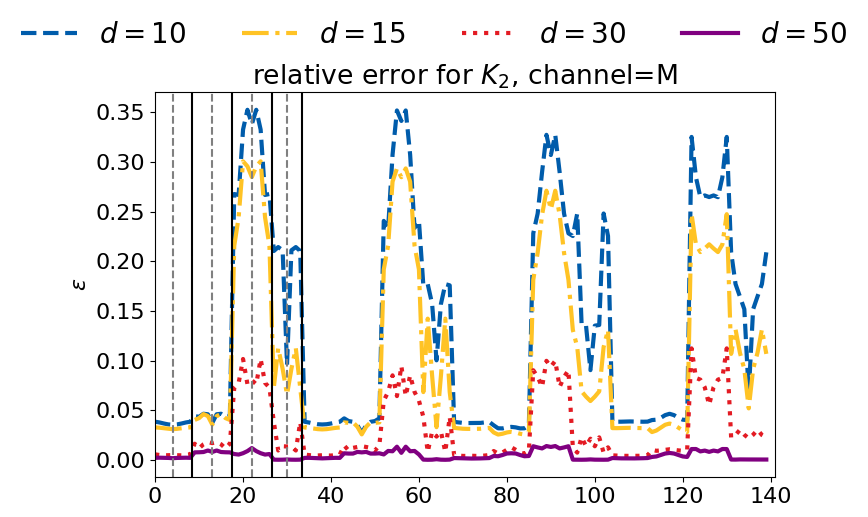

-----------------------------
10
15
30
50


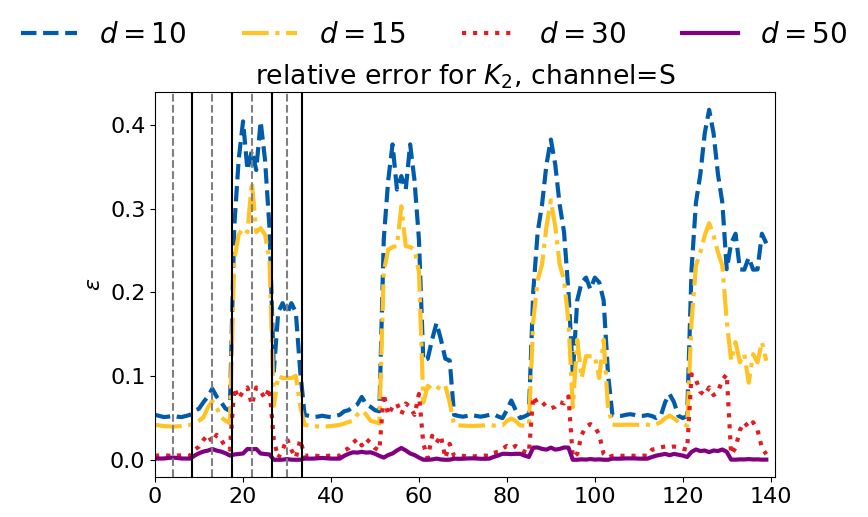

-----------------------------


In [7]:
for ch in ["D","M","S"]:
    filename = f"/mnt/home/jzang/ceph/freq_frg/store_data/vertex_K2.h5"
    with h5py.File(filename, 'r') as file:
        vertex_K2_ch=np.array(file[f'vertex_K2_{ch}'])
        vertex_K2_ch_mean=np.array(file[f'vertex_K2_{ch}_mean'])
    vertex_K2_ch=vertex_K2_ch.reshape(vertex_K2_ch.shape[0],-1)
    components =50
    # print(f"component={components}")
    # Perform PCA using fbpca
    U, S, Vh = fbpca.pca(vertex_K2_ch, k=components, raw=True,n_iter=4,l=components+10)
    
    exp_var = (S**2) / np.sum(S**2)
    exp_var_ratio = exp_var * 100  # Convert to percentage
    
    cum_exp_var = np.cumsum(exp_var_ratio)

    ########################
    sample=20
    errors_pca_list=[]
    pca_latent_dims = [10,15,30,50]
    for latent_dim in pca_latent_dims:
        using_pca=latent_dim
        print(using_pca)
        reconstructed_imag = np.dot(U[:,:using_pca] * S[:using_pca], Vh[:using_pca, :])
    
        # Calculate error for complex data
    
        squared_diff_magnitude = np.sum(np.abs(vertex_K2_ch - reconstructed_imag)**2, axis=1)
        squared_orig_magnitude = np.sum(np.abs(vertex_K2_ch)**2, axis=1)
        error = np.sqrt(squared_diff_magnitude / squared_orig_magnitude)
        errors_pca_list.append(error)
        
    cmap_blue = plt.get_cmap('Blues')
    cmap_red = plt.get_cmap('Reds')
    
    line_colors = [(0, 92/255, 171/255), (255/255, 195/255, 37/255),  (227/255, 27/255, 35/255),"purple"]
    
    line_styles = [ 'dashed', 'dashdot','dotted','solid']
    
    
    
    fig, ax = plt.subplots(figsize=(8,5))
    # Plotting the errors for PCA
    
    for i, latent_dim in enumerate(pca_latent_dims):
        color = cmap_red((5-i) / 5)  # Adjust intensity based on position
        color=line_colors[i]
        ax.plot( errors_pca_list[i], label=f'$d={latent_dim}$',  color=color,linestyle=line_styles[i],linewidth=3)
    # ax.set_xlabel(f'$t\'$')
    ax.set_ylabel(r'$\epsilon$')
    plt.title(f"relative error for $K_2$, channel={ch}")
    ax.legend(loc='upper center', bbox_to_anchor=(0.45, 1.25), ncol=4, fontsize=20, frameon=False)
    plt.xlim(0,141)
    for x in [4,13,22,30]:
        plt.axvline(x=x, color="gray",linestyle="dashed")
    for x in [8.5,17.5,26.5,33.5]:
        plt.axvline(x=x, color="black",linestyle="solid")
    plt.show()
    print("-----------------------------")
